In [1]:
import sqlite3 as sq
import pandas as pd

%matplotlib inline

In [2]:
conn = sq.connect('factbook.db')

In [8]:
pd.read_sql_query('SELECT * FROM sqlite_master', conn)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [11]:
pd.read_sql_query('SELECT * FROM facts LIMIT 5', conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


In [21]:
pd.read_sql_query('SELECT * FROM facts WHERE population = (SELECT MIN(population) FROM facts)', conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,250,ay,Antarctica,None,280000,None,0,None,None,None,None


It is clear, here, that the CIA Fact Sheet contains data about the entire Global population and not specific to only countries. Antartica is not a country and has no permanent human inhabitants. Hence, the population is 0.

In [22]:
pd.read_sql_query('SELECT * FROM facts WHERE population = (SELECT MAX(population) FROM facts)', conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,261,xx,World,None,None,None,7256490011,1.08,18.6,7.8,None


As we noticed earlier, the CIA Fact Sheet contains data for the entire globe, including the total for the entire World itself. This record too is not specific to any one country, but lists the entire global population.

In [18]:
pd.read_sql_query('SELECT * FROM facts WHERE population_growth = (SELECT MIN(population_growth) FROM facts)', conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,190,vt,Holy See (Vatican City),0,0,0.0,842,0.0,NaN,NaN,NaN
1,200,ck,Cocos (Keeling) Islands,14,14,0.0,596,0.0,NaN,NaN,NaN
2,207,gl,Greenland,2166086,2166086,NaN,57733,0.0,14.48,8.49,5.98
3,238,pc,Pitcairn Islands,47,47,0.0,48,0.0,NaN,NaN,NaN


In [20]:
pd.read_sql_query('SELECT * FROM facts WHERE population_growth = (SELECT MAX(population_growth) FROM facts)', conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,162,od,South Sudan,644329,None,None,12042910,4.02,36.91,8.18,11.47


In [24]:
facts_data = pd.read_sql_query('SELECT * FROM facts', conn)

In [25]:
facts_data

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230.0,652230.0,0.0,3.256434e+07,2.32,38.57,13.89,1.51
1,2,al,Albania,28748.0,27398.0,1350.0,3.029278e+06,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741.0,2381741.0,0.0,3.954217e+07,1.84,23.67,4.31,0.92
3,4,an,Andorra,468.0,468.0,0.0,8.558000e+04,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700.0,1246700.0,0.0,1.962535e+07,2.78,38.78,11.49,0.46
5,6,ac,Antigua and Barbuda,442.0,442.0,0.0,9.243600e+04,1.24,15.85,5.69,2.21
6,7,ar,Argentina,2780400.0,2736690.0,43710.0,4.343189e+07,0.93,16.64,7.33,0.00
7,8,am,Armenia,29743.0,28203.0,1540.0,3.056382e+06,0.15,13.61,9.34,5.80
8,9,as,Australia,7741220.0,7682300.0,58920.0,2.275101e+07,1.07,12.15,7.14,5.65
9,10,au,Austria,83871.0,82445.0,1426.0,8.665550e+06,0.55,9.41,9.42,5.56


In [29]:
non_outliers = facts_data[(facts_data['name'] != 'Antarctica') & (facts_data['name'] != 'World')]

In [30]:
non_outliers

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230.0,652230.0,0.0,32564342.0,2.32,38.57,13.89,1.51
1,2,al,Albania,28748.0,27398.0,1350.0,3029278.0,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741.0,2381741.0,0.0,39542166.0,1.84,23.67,4.31,0.92
3,4,an,Andorra,468.0,468.0,0.0,85580.0,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700.0,1246700.0,0.0,19625353.0,2.78,38.78,11.49,0.46
5,6,ac,Antigua and Barbuda,442.0,442.0,0.0,92436.0,1.24,15.85,5.69,2.21
6,7,ar,Argentina,2780400.0,2736690.0,43710.0,43431886.0,0.93,16.64,7.33,0.00
7,8,am,Armenia,29743.0,28203.0,1540.0,3056382.0,0.15,13.61,9.34,5.80
8,9,as,Australia,7741220.0,7682300.0,58920.0,22751014.0,1.07,12.15,7.14,5.65
9,10,au,Austria,83871.0,82445.0,1426.0,8665550.0,0.55,9.41,9.42,5.56


In [31]:
visualization_data = pd.read_sql_query('SELECT population, population_growth, birth_rate, death_rate FROM facts WHERE name <> "World" AND name <> "Antarctica"', conn)

In [32]:
visualization_data

,population,population_growth,birth_rate,death_rate
0,32564342.0,2.32,38.57,13.89
1,3029278.0,0.30,12.92,6.58
2,39542166.0,1.84,23.67,4.31
3,85580.0,0.12,8.13,6.96
4,19625353.0,2.78,38.78,11.49
5,92436.0,1.24,15.85,5.69
6,43431886.0,0.93,16.64,7.33
7,3056382.0,0.15,13.61,9.34
8,22751014.0,1.07,12.15,7.14
9,8665550.0,0.55,9.41,9.42


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0a906e8c50>,
      dtype=object)

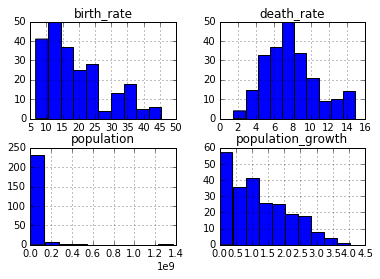

In [33]:
visualization_data.hist()

### Which Countries have the highest population density?

In [38]:
pd.read_sql_query('SELECT name, CAST(population as float) / CAST(area_land as float) AS population_density FROM facts ORDER BY population_density DESC LIMIT 5', conn)

,name,population_density
0,Macau,21168.964286
1,Monaco,15267.500000
2,Singapore,8259.784571
3,Hong Kong,6655.271202
4,Gaza Strip,5191.819444


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0a8e428390>]],
      dtype=object)

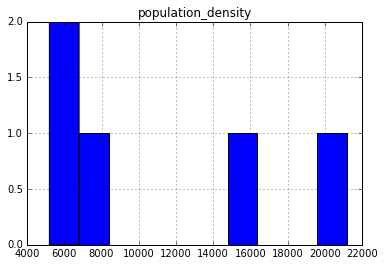

In [39]:
pd.read_sql_query('SELECT name, CAST(population as float) / CAST(area_land as float) AS population_density FROM facts ORDER BY population_density DESC LIMIT 5', conn).hist()

### Water vs Land

In [40]:
pd.read_sql_query('SELECT name, CAST(area_water as float) / CAST(area_land as float) AS water_to_land FROM facts ORDER BY water_to_land DESC LIMIT 5', conn)

,name,water_to_land
0,British Indian Ocean Territory,905.666667
1,Virgin Islands,4.520231
2,Puerto Rico,0.554791
3,"Bahamas, The",0.386613
4,Guinea-Bissau,0.284673


In [41]:
pd.read_sql_query('SELECT name, area_water, area_land, CAST(area_water as float) / CAST(area_land as float) AS water_to_land FROM facts WHERE area_water > area_land ORDER BY water_to_land DESC', conn)

,name,area_water,area_land,water_to_land
0,British Indian Ocean Territory,54340,60,905.666667
1,Virgin Islands,1564,346,4.520231
